In [2]:
import torch
import matplotlib.pyplot as plt

X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X
Y = func + 0.4 * torch.randn(X.size())

# defining the function for forward pass for prediction
def forward(x):
    return w * x + b

# evaluating data points with Mean Square Error.
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

w = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)

step_size = 0.1
loss_list = []
iter = 20

In [3]:
for i in range (iter):    
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))

0, 	595.5802001953125, 	-1.9034042358398438, 	-16.055166244506836
1, 	343.18194580078125, 	-7.264384746551514, 	-12.818333625793457
2, 	202.77117919921875, 	-3.656242609024048, 	-10.282477378845215
3, 	122.30497741699219, 	-6.037514686584473, 	-8.217710494995117
4, 	74.98600006103516, 	-4.428558349609375, 	-6.589710235595703
5, 	46.56035232543945, 	-5.485452651977539, 	-5.271220684051514
6, 	29.19412612915039, 	-4.767319202423096, 	-4.2269978523254395
7, 	18.446853637695312, 	-5.2358717918396, 	-3.3844382762908936
8, 	11.731634140014648, 	-4.914921760559082, 	-2.715076208114624
9, 	7.506232738494873, 	-5.122302055358887, 	-2.176377058029175
10, 	4.834025859832764, 	-4.9785919189453125, 	-1.747491478919983
11, 	3.1379919052124023, 	-5.070158004760742, 	-1.402945876121521
12, 	2.058781385421753, 	-5.005638122558594, 	-1.1282250881195068
13, 	1.370834231376648, 	-5.045925617218018, 	-0.9078031778335571
14, 	0.9317470788955688, 	-5.016849517822266, 	-0.7318686246871948
15, 	0.6512516140937

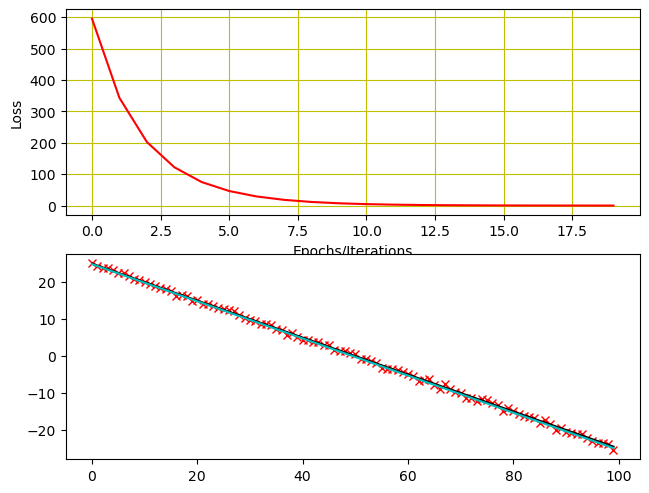

In [4]:
# Plotting the loss after each iteration
plt.subplot(2,1,1)
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.subplot(2,1,2)
plt.plot(Y.detach(), 'rx')
plt.plot(func.detach(), 'k-')
plt.plot((w*X + b).detach(), 'c-')
plt.show()